# Formula 1 - 2021 Season Analysis

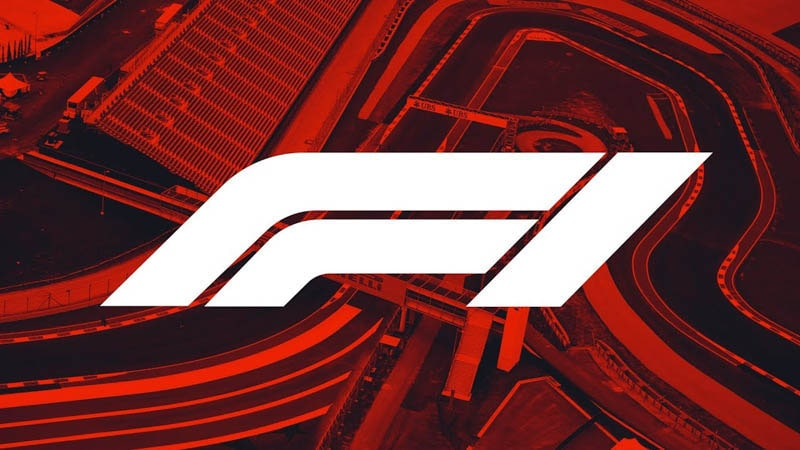

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as timedelta
%matplotlib inline

In [41]:
calendar = pd.read_csv(r"C:\users\asus\Downloads/formula1_2021season_calendar.csv")
calendar.set_index('Round', inplace=True)
drivers = pd.read_csv(r"C:\users\asus\Downloads/formula1_2021season_drivers.csv")
drivers.set_index('Abbreviation', inplace=True)
teams = pd.read_csv(r"C:\users\asus\Downloads/formula1_2021season_teams.csv")
teams.index = range(1,11)
sprintQualiresults = pd.read_csv(r"C:\users\asus\Downloads/formula1_2021season_sprintQualifyingResults.csv")
raceResults = pd.read_csv(r"C:\users\asus\Downloads/formula1_2021season_raceResults.csv")

In [76]:
def assign_color(val_type, values):
    cl = []
    for val in values:
        if val_type == 'drivers': 
            abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams': 
            abbr = val[0:4].upper()

        if abbr in ['ALFA', 'RAI', 'GIO', 'KUB']:
            cl.append('#900000')
        elif abbr in ['FERR', 'LEC', 'SAI']:
            cl.append('#cb0000')
        elif abbr in ['HAAS', 'SCH', 'MAZ']:
            cl.append('#ffffff')
        elif abbr in ['ASTO', 'VET', 'STR']:
            cl.append('#006f62')
        elif abbr in ['WILL', 'RUS', 'LAT']:
            cl.append('#0072ff')
        elif abbr in ['ALPH', 'GAS', 'TSU']:
            cl.append('#2b5962')
        elif abbr in ['MCLA', 'RIC', 'NOR']:
            cl.append('#ff8700')
        elif abbr in ['RED ', 'VER', 'PER']:
            cl.append('#0600f0')
        elif abbr in ['MERC', 'HAM', 'BOT']:
            cl.append('#00d2bd')
        elif abbr in ['ALPI', 'ALO', 'OCO']:
            cl.append('#0090ff')
    
    return cl


## F1 2021 Season Race Calendar

In [43]:
calendar

,Country,City,Circuit Name,GP Name,Race Date,First GP,Number of Laps,Circuit Length(km),Race Distance(km),Lap Record,Record Owner,Record Year,Turns,DRS Zones
Round,,,,,,,,,,,,,,
1,Bahrain,Sakhir,Bahrain International Circuit,Bahrain,28 Mar 2021,2004,57,5.412,308.238,1:31.447,Pedro de la Rosa,2005,15,3
2,Italy,Imola,Autodromo Enzo e Dino Ferrari,Emilia Romagna,18 Apr 2021,1980,63,4.909,309.049,1:15.484,Lewis Hamilton,2020,19,1
3,Portugal,Portimao,Autodromo Internacional do Algarve,Portugal,02 May 2021,2020,66,4.653,306.826,1:18.750,Lewis Hamilton,2020,15,1
4,Spain,Catalunya,Circuit de Barcelona-Catalunya,Spain,09 May 2021,1991,66,4.675,308.424,1:18.149,Max Verstappen,2021,16,2
5,Monaco,Monte Carlo,Circuit de Monaco,Monaco,23 May 2021,1950,78,3.337,260.286,1:12.909,Lewis Hamilton,2021,19,1
6,Azerbaijan,Baku,Baku City Circuit,Azerbaijan,06 Jun 2021,2016,51,6.003,306.049,1:43.009,Charles Leclerc,2019,20,2
7,France,Le Castellet,Circuit Paul Ricard,France,20 Jun 2021,1971,53,5.842,309.690,1:32.740,Sebastian Vettel,2019,15,2
8,Austria,Spielberg,Red Bull Ring,Styria,04 Jul 2021,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3
9,Austria,Spielberg,Red Bull Ring,Austria,18 Jul 2021,1970,71,4.318,306.452,1:05.619,Carlos Sainz,2020,10,3


## 2021 Season - Teams

In [77]:
teams

,Team,Full Team Name,Base,Team Chief,Technical Chief,Chassis,Power Unit,First Team Entry,World Championships,Highest Race Finish,Pole Positions,Fastest Laps
1,Mercedes,Mercedes-AMG Petronas Formula One Team,"Brackley, United Kingdom",Toto Wolff,Mike Elliott,W12,Mercedes,1970,8,1(x115),127,85
2,Red Bull,Red Bull Racing,"Milton Keynes, United Kingdom",Christian Horner,Pierre Waché,RB16B,Honda,1997,4,1(x75),73,76
3,Ferrari,Scuderia Ferrari,"Maranello, Italy",Mattia Binotto,Enrico Cardile / Enrico Gualteri,SF21,Ferrari,1950,16,1(x239),223,253
4,McLaren,McLaren F1 Team,"Woking, United Kingdom",Andreas Seidl,James Key,MCL35M,Mercedes,1966,8,1(x183),156,160
5,Alpine,Alpine F1 Team,"Enstone, United Kingdom",Davide Brivio,Pat Fry / Remi Taffin,A521,Renault,1986,2,1(x21),20,15
6,AlphaTauri,Scuderia AlphaTauri,"Faenza, Italy",Franz Tost,Jody Egginton,AT02,Honda,1985,0,1(x2),1,2
7,Aston Martin,Aston Martin Cognizant Formula One Team,"Silverstone, United Kingdom",Otmar Szafnauer,Andrew Green,AMR21,Mercedes,2018,0,1(x1),1,0
8,Williams,Williams Racing,"Grove, United Kingdom",Jost Capito,François-Xavier Demaison,FW43B,Mercedes,1978,9,1(x114),129,133
9,Alfa Romeo,Alfa Romeo F1 Team ORLEN,"Hinwil, Switzerland",Frédéric Vasseur,Jan Monchaux,C41,Ferrari,1993,0,1(x1),1,5
10,Haas,Uralkali Haas F1 Team,"Kannapolis, United States",Guenther Steiner,Simone Resta,VF-21,Ferrari,2016,0,4(x1),0,2


## 2021 Season = Drivers

In [78]:

drivers

,Driver,Number,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Race Finish,Highest Grid Position,Date of Birth,Place of Birth
Abbreviation,,,,,,,,,,,,
HAM,Lewis Hamilton,44,Mercedes,United Kingdom,182,4165.5,288,7,1(x103),1,07/01/1985,"Stevenage, England"
BOT,Valtteri Bottas,77,Mercedes,Finland,67,1738.0,178,0,1(x10),1,28/08/1989,"Nastola, Finland"
VER,Max Verstappen,33,Red Bull Racing,Netherlands,60,1557.5,141,1,1(x20),1,30/09/1997,"Hasselt, Belgium"
PER,Sergio Perez,11,Red Bull Racing,Mexico,15,896.0,214,0,1(x2),2,26/01/1990,"Guadalajara, Mexico"
LEC,Charles Leclerc,16,Ferrari,Monaco,13,560.0,81,0,1(x2),1,16/10/1997,"Monte Carlo, Monaco"
SAI,Carlos Sainz,55,Ferrari,Spain,6,536.5,141,0,2(x2),2,01/09/1994,"Madrid, Spain"
NOR,Lando Norris,4,McLaren,United Kingdom,5,306.0,60,0,2(x1),1,13/11/1999,"Bristol, England"
RIC,Daniel Ricciardo,3,McLaren,Australia,32,1274.0,210,0,1(x8),1,01/07/1989,"Perth, Australia"
OCO,Esteban Ocon,31,Alpine,France,2,272.0,89,0,1(x1),3,17/09/1996,"Evreux, Normandy"


## Thilling Races of 2021 Season

In [79]:
MonzaResults = raceResults[raceResults['Track'] == 'Italy'].set_index('Position').drop('Track', axis=1).head(10)
MonzaResults['Points'] = MonzaResults['Points'].astype(int)
MonzaResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,3,Daniel Ricciardo,McLaren Mercedes,2.0,53,1:21:54.365,26,Yes,1:24.812
2,4,Lando Norris,McLaren Mercedes,3.0,53,+1.747,18,No,1:24.971
3,77,Valtteri Bottas,Mercedes,19.0,53,+4.921,15,No,1:24.872
4,16,Charles Leclerc,Ferrari,5.0,53,+7.309,12,No,1:25.319
5,11,Sergio Perez,Red Bull Racing Honda,8.0,53,+8.723,10,No,1:25.156
6,55,Carlos Sainz,Ferrari,6.0,53,+10.535,8,No,1:25.559
7,18,Lance Stroll,Aston Martin Mercedes,9.0,53,+15.804,6,No,1:25.853
8,14,Fernando Alonso,Alpine Renault,10.0,53,+17.201,4,No,1:25.472
9,63,George Russell,Williams Mercedes,14.0,53,+19.742,2,No,1:25.835


In [80]:
MonacoResults = raceResults[raceResults['Track'] == 'Monaco'].set_index('Position').drop('Track', axis=1).head(10)
MonacoResults['Points'] = MonacoResults['Points'].astype(int)
MonacoResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,33,Max Verstappen,Red Bull Racing Honda,2.0,78,1:38:56.820,25,No,1:14.649
2,55,Carlos Sainz,Ferrari,4.0,78,+8.968,18,No,1:14.621
3,4,Lando Norris,McLaren Mercedes,5.0,78,+19.427,15,No,1:14.670
4,11,Sergio Perez,Red Bull Racing Honda,9.0,78,+20.490,12,No,1:14.552
5,5,Sebastian Vettel,Aston Martin Mercedes,8.0,78,+52.591,10,No,1:15.316
6,10,Pierre Gasly,AlphaTauri Honda,6.0,78,+53.896,8,No,1:15.412
7,44,Lewis Hamilton,Mercedes,7.0,78,+68.231,7,Yes,1:12.909
8,18,Lance Stroll,Aston Martin Mercedes,13.0,77,+1 lap,4,No,1:14.674
9,31,Esteban Ocon,Alpine Renault,11.0,77,+1 lap,2,No,1:15.316


In [115]:
TurkeyResults = raceResults[raceResults['Track'] == 'Turkey'].set_index('Position').drop('Track', axis=1).head(10)
TurkeyResults['Points'] = TurkeyResults['Points'].astype(int)
TurkeyResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,77,Valtteri Bottas,Mercedes,1.0,58,1:31:04.103,26,Yes,1:30.432
2,33,Max Verstappen,Red Bull Racing Honda,2.0,58,+14.584,18,No,1:32.759
3,11,Sergio Perez,Red Bull Racing Honda,6.0,58,+33.471,15,No,1:32.459
4,16,Charles Leclerc,Ferrari,3.0,58,+37.814,12,No,1:32.737
5,44,Lewis Hamilton,Mercedes,11.0,58,+41.812,10,No,1:32.763
6,10,Pierre Gasly,AlphaTauri Honda,4.0,58,+44.292,8,No,1:32.814
7,4,Lando Norris,McLaren Mercedes,7.0,58,+47.213,6,No,1:32.446
8,55,Carlos Sainz,Ferrari,19.0,58,+51.526,4,No,1:31.921
9,18,Lance Stroll,Aston Martin Mercedes,8.0,58,+82.018,2,No,1:32.608


In [82]:
AzerbaijanResults = raceResults[raceResults['Track'] == 'Azerbaijan'].set_index('Position').drop('Track', axis=1).head(10)
AzerbaijanResults['Points'] = AzerbaijanResults['Points'].astype(int)
AzerbaijanResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,11,Sergio Perez,Red Bull Racing Honda,6.0,51,2:13:36.410,25,No,1:44.687
2,5,Sebastian Vettel,Aston Martin Mercedes,11.0,51,+1.385,18,No,1:44.890
3,10,Pierre Gasly,AlphaTauri Honda,4.0,51,+2.762,15,No,1:45.220
4,16,Charles Leclerc,Ferrari,1.0,51,+3.828,12,No,1:45.382
5,4,Lando Norris,McLaren Mercedes,9.0,51,+4.754,10,No,1:45.326
6,14,Fernando Alonso,Alpine Renault,8.0,51,+6.382,8,No,1:45.624
7,22,Yuki Tsunoda,AlphaTauri Honda,7.0,51,+6.624,6,No,1:44.939
8,55,Carlos Sainz,Ferrari,5.0,51,+7.709,4,No,1:45.700
9,3,Daniel Ricciardo,McLaren Mercedes,13.0,51,+8.874,2,No,1:45.713


In [83]:
AbuDhabiResults = raceResults[raceResults['Track'] == 'Abu Dhabi'].set_index('Position').drop('Track', axis=1).head(10)
AbuDhabiResults['Points'] = AbuDhabiResults['Points'].astype(int)
AbuDhabiResults

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Position,,,,,,,,,
1,33,Max Verstappen,Red Bull Racing Honda,1.0,58,1:30:17.345,26,Yes,1:26.103
2,44,Lewis Hamilton,Mercedes,2.0,58,+2.256,18,No,1:26.615
3,55,Carlos Sainz,Ferrari,5.0,58,+5.173,15,No,1:27.618
4,22,Yuki Tsunoda,AlphaTauri Honda,8.0,58,+5.692,12,No,1:27.496
5,10,Pierre Gasly,AlphaTauri Honda,12.0,58,+6.531,10,No,1:27.342
6,77,Valtteri Bottas,Mercedes,6.0,58,+7.463,8,No,1:26.862
7,4,Lando Norris,McLaren Mercedes,3.0,58,+59.200,6,No,1:26.762
8,14,Fernando Alonso,Alpine Renault,11.0,58,+61.708,4,No,1:27.607
9,31,Esteban Ocon,Alpine Renault,9.0,58,+64.026,2,No,1:28.249


In [84]:
#drivers standings
driverPts = raceResults.groupby(['Driver', 'Team'])['Points'].sum()
sprintQualiDriverPts = sprintQualiresults.groupby(['Driver', 'Team'])['Points'].sum()
driverPts = (driverPts+sprintQualiDriverPts).sort_values(ascending=False).reset_index()
driverPts.index = [i for i in range(1,22)]
driverPts

,Driver,Team,Points
1,Max Verstappen,Red Bull Racing Honda,395.5
2,Lewis Hamilton,Mercedes,387.5
3,Valtteri Bottas,Mercedes,226.0
4,Sergio Perez,Red Bull Racing Honda,190.0
5,Carlos Sainz,Ferrari,164.5
6,Lando Norris,McLaren Mercedes,160.0
7,Charles Leclerc,Ferrari,159.0
8,Daniel Ricciardo,McLaren Mercedes,115.0
9,Pierre Gasly,AlphaTauri Honda,110.0
10,Fernando Alonso,Alpine Renault,81.0


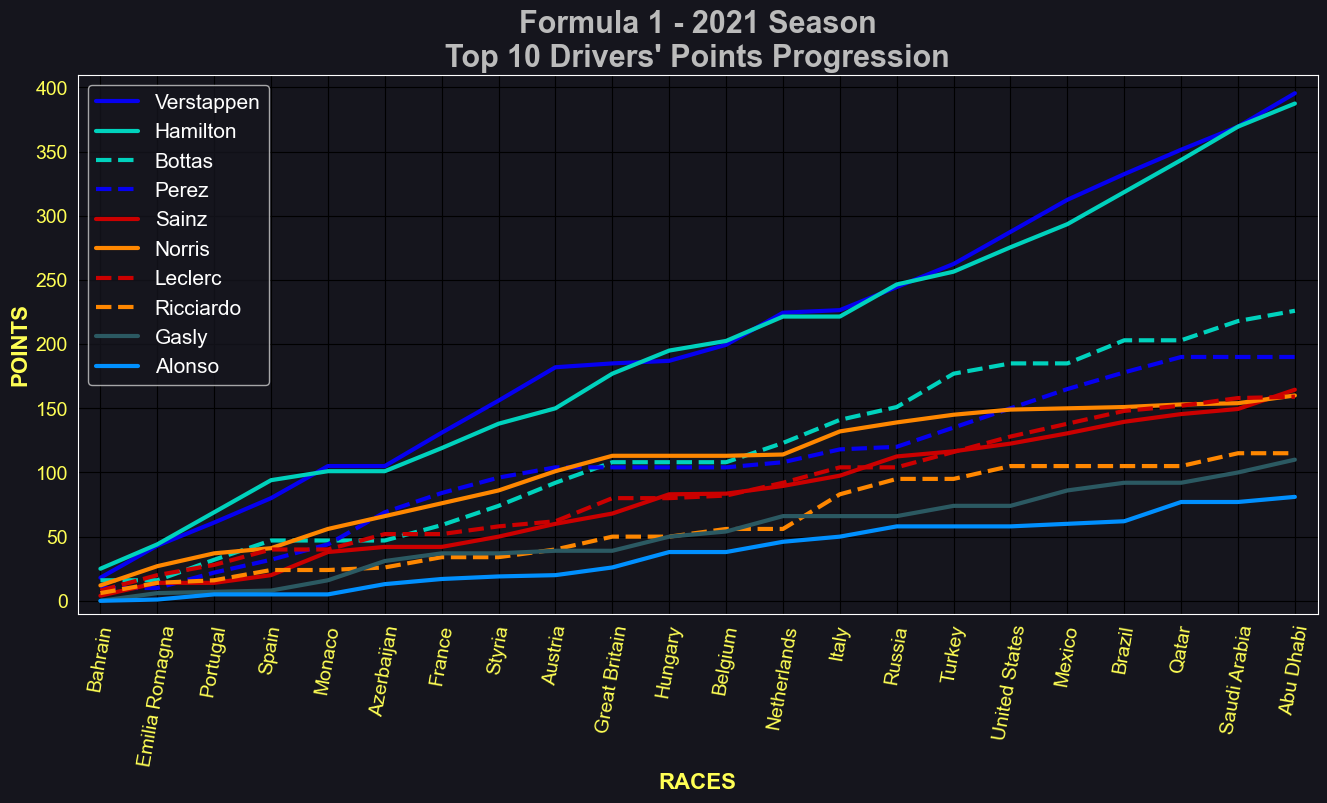

In [85]:
tracks = raceResults['Track'].unique()
sns.set_style("darkgrid")
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151d'
plt.rcParams['figure.facecolor'] = '#15151d'
plt.rcParams['grid.color'] = '#000000'
top10 = driverPts['Driver'].values[:10]
c = assign_color("drivers", top10)
plt.figure(figsize=(16,7))
plt.axis([-0.4, 21.4, -10, 410])
for i in range(len(top10)):
    ls = '-'
    pts = raceResults[raceResults['Driver'] == top10[i]]['Points'].values
    if top10[i] == "Max Verstappen":     pts[9] += 3;  pts[13] += 2;  pts[18] += 2
    elif top10[i] == "Lewis Hamilton":   pts[9] += 2;
    elif top10[i] == "Valtteri Bottas":  pts[9] += 1;  pts[13] += 3;  pts[18] += 3;  ls = '--';
    elif top10[i] == "Daniel Ricciardo":  pts[13] += 1;  ls = '--';
    elif top10[i] == "Carlos Sainz":     pts[18] += 1;
    elif top10[i] == "Sergio Perez" or top10[i] == "Charles Leclerc":  ls = '--'
    plt.plot(np.cumsum(pts), linewidth=3, label=top10[i].split()[1], color=c[i], linestyle=ls)
plt.title("Formula 1 - 2021 Season\nTop 10 Drivers' Points Progression", color='#bbbbbb', fontsize=22, fontweight='bold')
plt.legend(fontsize=15)
plt.xlabel('RACES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('POINTS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=14, color='#ffff55')
plt.show()

# Hamilton v/s Verstappen

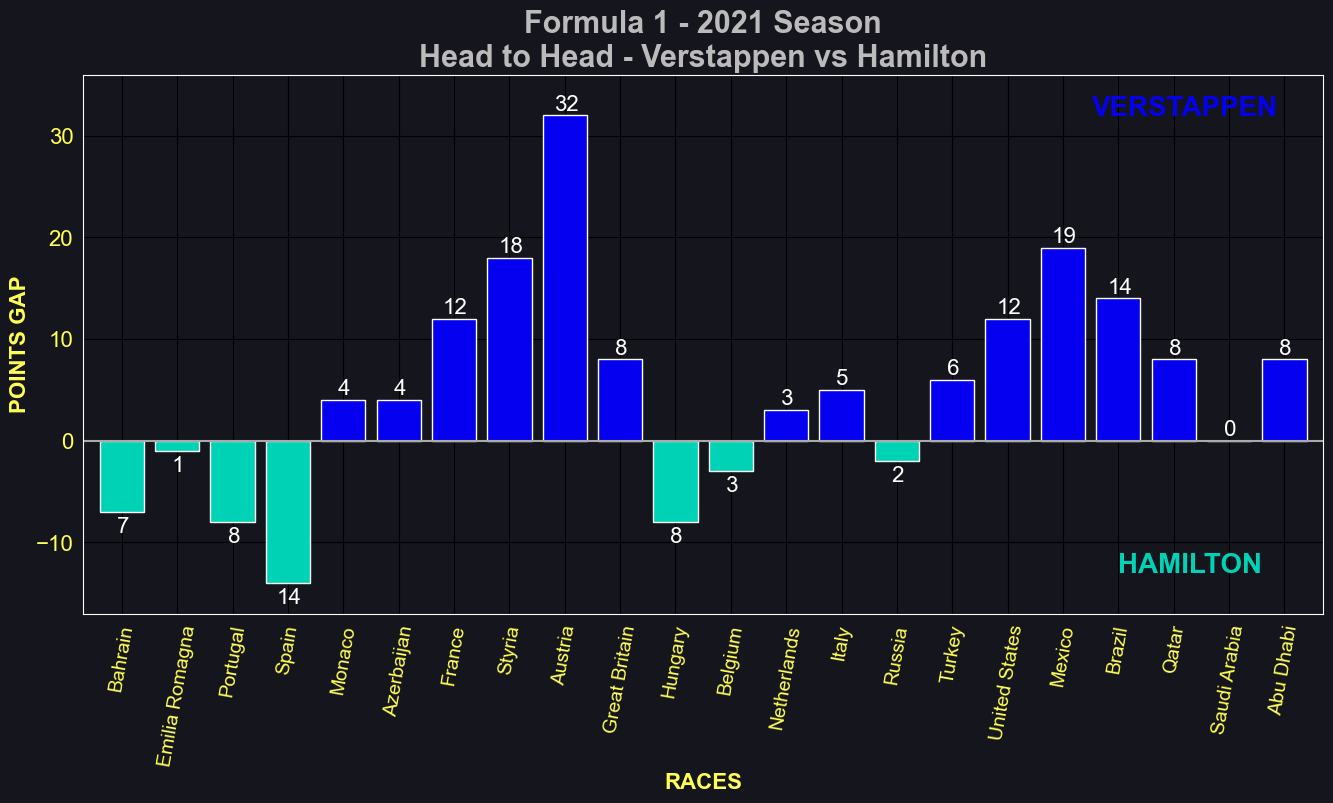

In [86]:

verPts = raceResults[raceResults['Driver'] == 'Max Verstappen']['Points'].values
verPts[9] += 3;  verPts[13] += 2;  verPts[18] += 2
hamPts = raceResults[raceResults['Driver'] == 'Lewis Hamilton']['Points'].values
hamPts[9] += 2
pointsGap = np.cumsum(verPts) - np.cumsum(hamPts)
c = []
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   c.append('#0600f0')
    else:    c.append('#00d2b5')
plt.figure(figsize=(16,7))
plt.axis([-0.7, 21.7, min(pointsGap)-3, max(pointsGap)+4])
plt.bar(tracks, pointsGap, color=c)
for i in range(len(pointsGap)):
    if pointsGap[i] >= 0:   vsh = 0.5
    else:   vsh = -2
    plt.text(i-0.2, pointsGap[i]+vsh, "{:2}".format(int(abs(pointsGap[i]))), fontsize=16)
plt.axhline(0, color='#aaaaaa')
plt.text(17.5, 32, "VERSTAPPEN", color="#0600f0", fontsize=20, fontweight='bold')
plt.text(18, -13, "HAMILTON", color="#00d2b5", fontsize=20, fontweight='bold')
plt.title("Formula 1 - 2021 Season\nHead to Head - Verstappen vs Hamilton", color='#bbbbbb', 
          fontsize=22, fontweight='bold')
plt.xlabel('RACES', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,len(tracks)), tracks, fontsize=14, color='#ffff55', rotation=80)
plt.ylabel('POINTS GAP', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=16, color='#ffff55')
plt.show()

## 2021 Season - Constructor Standings

In [88]:

teamPts = raceResults.groupby('Team')['Points'].sum()
sprintQualiTeamPts = sprintQualiresults.groupby('Team')['Points'].sum()
teamPts = (teamPts+sprintQualiTeamPts).sort_values(ascending=False).reset_index()
teamPts.index = [i for i in range(1,11)]
teamPts

,Team,Points
1,Mercedes,613.5
2,Red Bull Racing Honda,585.5
3,Ferrari,323.5
4,McLaren Mercedes,275.0
5,Alpine Renault,155.0
6,AlphaTauri Honda,142.0
7,Aston Martin Mercedes,77.0
8,Williams Mercedes,23.0
9,Alfa Romeo Racing Ferrari,13.0
10,Haas Ferrari,0.0


## 2021 Season - Sprint Qualifying Results & Points

In [92]:
sprintQualiresults

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,Great Britain,1,33,Max Verstappen,Red Bull Racing Honda,2,17,25:38.426,3
1,Great Britain,2,44,Lewis Hamilton,Mercedes,1,17,+1.430,2
2,Great Britain,3,77,Valtteri Bottas,Mercedes,3,17,+7.502,1
3,Great Britain,4,16,Charles Leclerc,Ferrari,4,17,+11.278,0
4,Great Britain,5,4,Lando Norris,McLaren Mercedes,6,17,+24.111,0
5,Great Britain,6,3,Daniel Ricciardo,McLaren Mercedes,7,17,+30.959,0
6,Great Britain,7,14,Fernando Alonso,Alpine Renault,11,17,+43.527,0
7,Great Britain,8,5,Sebastian Vettel,Aston Martin Mercedes,10,17,+44.439,0
8,Great Britain,9,63,George Russell,Williams Mercedes,8,17,+46.652,0
9,Great Britain,10,31,Esteban Ocon,Alpine Renault,13,17,+47.395,0


## Sprint Qualifying Winners

In [103]:
sprintQualiresults['Position'] = pd.to_numeric(sprintQualiresults['Position'])
sprint_winners = sprintQualiresults[sprintQualiresults['Position'] == 1]
sprint_winner_list = sprint_winners[['Track', 'Driver']]
sprint_winner_list


,Track,Driver
0,Great Britain,Max Verstappen
20,Italy,Valtteri Bottas
40,Brazil,Valtteri Bottas


## points earned in each quali

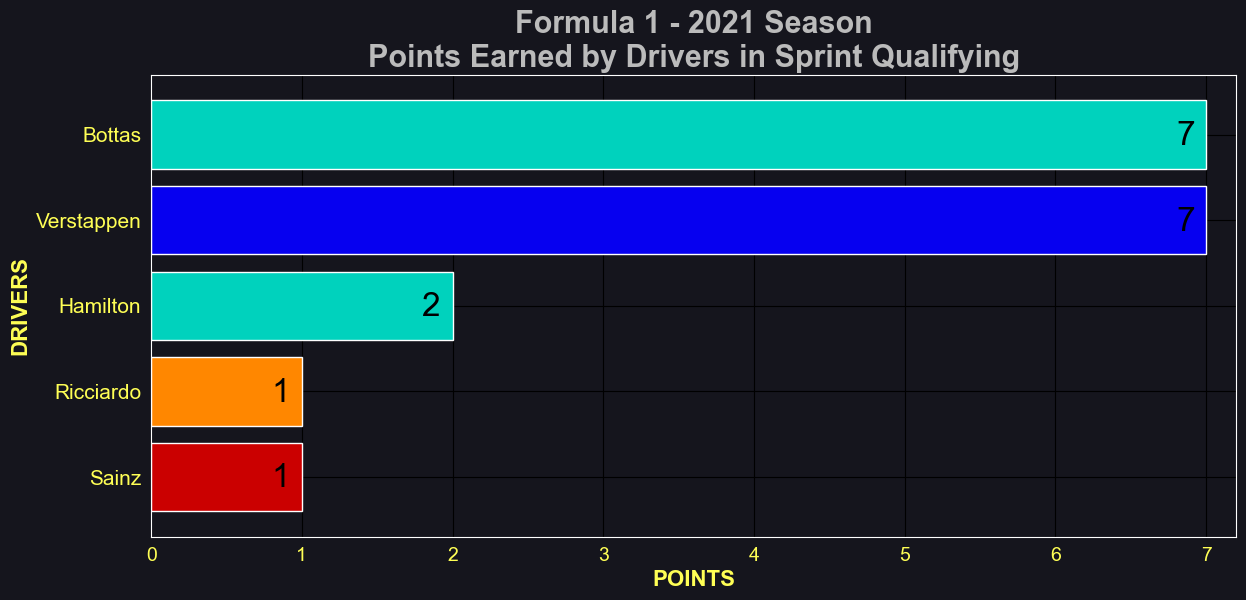

In [105]:
sprintQualiDriver = sprintQualiresults.groupby(['Driver', 'Team'])['Points'].sum().sort_values(ascending=False)
sprintQualiDriver = sprintQualiDriver[sprintQualiDriver > 0].reset_index()
sprintQualiDriver.index = [i for i in range(1,6)]
c = assign_color("drivers", sprintQualiDriver['Driver'])
surnames = [driver.split()[1] for driver in sprintQualiDriver['Driver']]
plt.figure(figsize=(14,6))
plt.axis([0,7.2,4.7,-0.7])
plt.barh(surnames, sprintQualiDriver['Points'], color=c)
for i in range(1,len(sprintQualiDriver)+1):
    plt.text(sprintQualiDriver['Points'][i]-0.2, i-0.88, sprintQualiDriver['Points'][i], fontsize=24, color='k')
plt.title("Formula 1 - 2021 Season\nPoints Earned by Drivers in Sprint Qualifying", 
          fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('POINTS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()


## Race Winners

In [107]:
raceWinners = raceResults[raceResults['Position'] == '1'].set_index('Track').drop('Position', axis=1)
raceWinners

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,44,Lewis Hamilton,Mercedes,2.0,56,1:32:03.897,25.0,No,1:34.015
Emilia Romagna,33,Max Verstappen,Red Bull Racing Honda,2.0,63,2:02:34.598,25.0,No,1:17.524
Portugal,44,Lewis Hamilton,Mercedes,2.0,66,1:34:31.421,25.0,No,1:20.933
Spain,44,Lewis Hamilton,Mercedes,1.0,66,1:33:07.680,25.0,No,1:20.665
Monaco,33,Max Verstappen,Red Bull Racing Honda,2.0,78,1:38:56.820,25.0,No,1:14.649
Azerbaijan,11,Sergio Perez,Red Bull Racing Honda,6.0,51,2:13:36.410,25.0,No,1:44.687
France,33,Max Verstappen,Red Bull Racing Honda,1.0,53,1:27:25.770,26.0,Yes,1:36.404
Styria,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:22:18.925,25.0,No,1:08.017
Austria,33,Max Verstappen,Red Bull Racing Honda,1.0,71,1:23:54.543,26.0,Yes,1:06.200


## Pole Positions

In [108]:
polePos = raceResults[raceResults['Starting Grid'] == 1].set_index('Track').drop('Starting Grid', axis=1)
polePos

,Position,No,Driver,Team,Laps,Time/Retired,Points,+1 Pt,Fastest Lap
Track,,,,,,,,,
Bahrain,2,33,Max Verstappen,Red Bull Racing Honda,56,+0.745,18.0,No,1:33.228
Emilia Romagna,2,44,Lewis Hamilton,Mercedes,63,+22.000,19.0,Yes,1:16.702
Portugal,3,77,Valtteri Bottas,Mercedes,66,+33.530,16.0,Yes,1:19.865
Spain,1,44,Lewis Hamilton,Mercedes,66,1:33:07.680,25.0,No,1:20.665
Monaco,NC,16,Charles Leclerc,Ferrari,0,DNS,0.0,No,NaN
Azerbaijan,4,16,Charles Leclerc,Ferrari,51,+3.828,12.0,No,1:45.382
France,1,33,Max Verstappen,Red Bull Racing Honda,53,1:27:25.770,26.0,Yes,1:36.404
Styria,1,33,Max Verstappen,Red Bull Racing Honda,71,1:22:18.925,25.0,No,1:08.017
Austria,1,33,Max Verstappen,Red Bull Racing Honda,71,1:23:54.543,26.0,Yes,1:06.200


## Podium Finishes

In [109]:
podiumFinish = raceResults[raceResults['Position'].isin(['1','2','3'])].set_index('Track').drop('Position', axis=1)

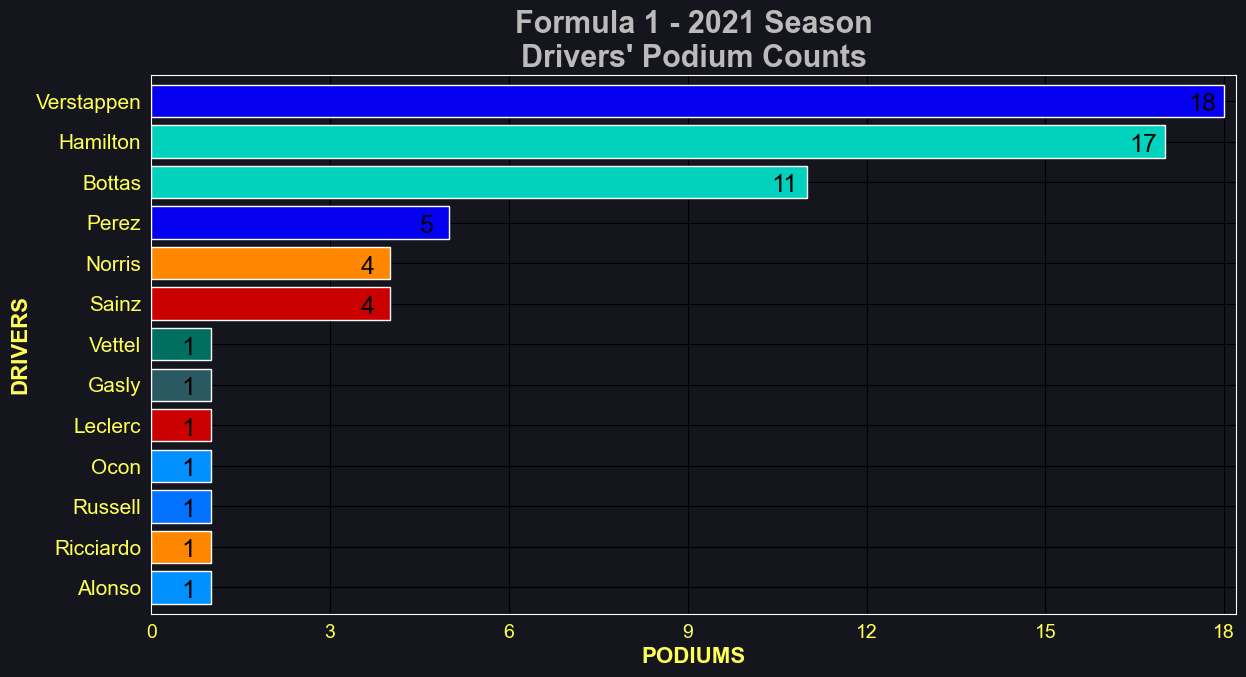

In [112]:
podiumCnt = podiumFinish['Driver'].value_counts()
c = assign_color("drivers", podiumCnt.index)
plt.figure(figsize=(14,7))
plt.axis([0,18.2,12.65,-0.65])
plt.barh([driver.split()[1] for driver in podiumCnt.index], podiumCnt.values, color=c)
for i in range(len(podiumCnt)):
    plt.text(podiumCnt.values[i]-0.6, i+0.25, "{:2}".format(podiumCnt.values[i]), fontsize=18, color='k')
plt.title("Formula 1 - 2021 Season\nDrivers' Podium Counts", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('PODIUMS', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(range(0,20,3), fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=15, color='#ffff55')
plt.show()

## DNF Analysis

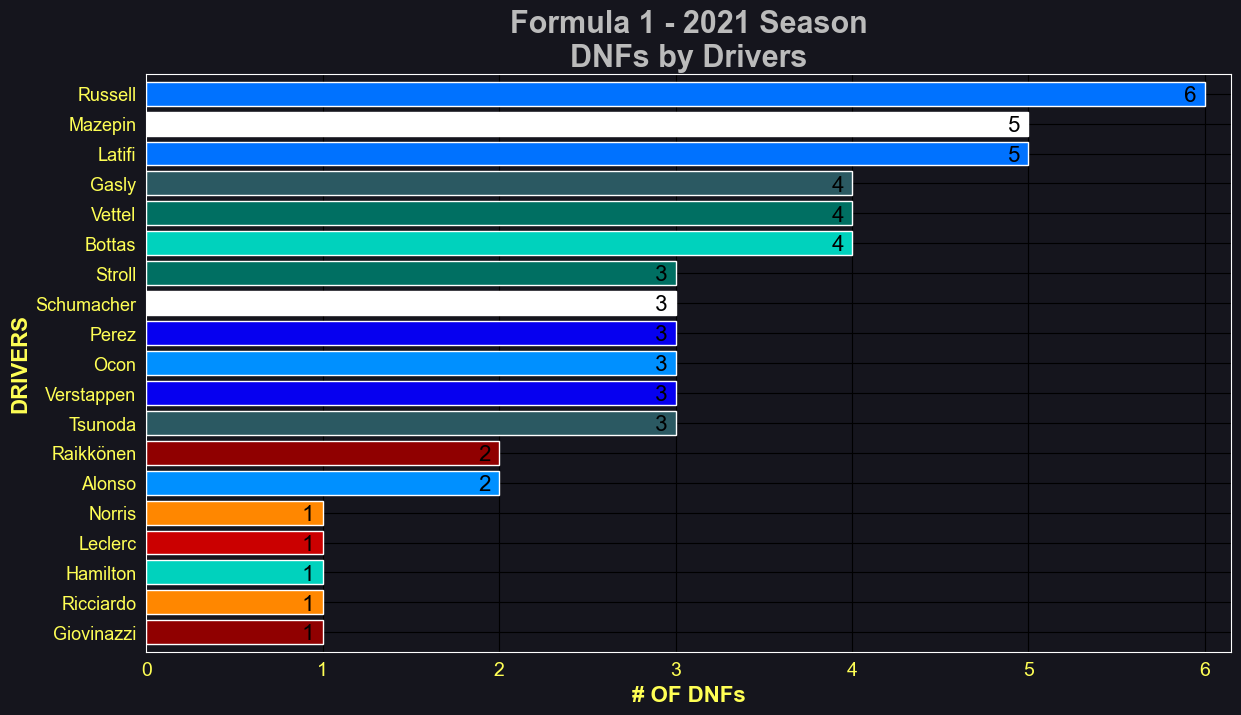

In [113]:
#DNF
dnfResultsDriver = raceResults[raceResults['Time/Retired'] == 'DNF']['Driver'].value_counts()
c = assign_color("drivers", dnfResultsDriver.index)
plt.figure(figsize=(14,7.5))
plt.axis([0,6.15,18.65,-0.65])
plt.barh([driver.split()[1] for driver in dnfResultsDriver.index], dnfResultsDriver.values, color=c)
for i in range(len(dnfResultsDriver)):
    plt.text(dnfResultsDriver.values[i]-0.15, i+0.25, "{:2}".format(dnfResultsDriver.values[i]), fontsize=16, color='k')
plt.title("Formula 1 - 2021 Season\nDNFs by Drivers", fontsize=22, fontweight='bold', color='#bbbbbb')
plt.xlabel('# OF DNFs', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

## Total Laps Driven in Race Sessions


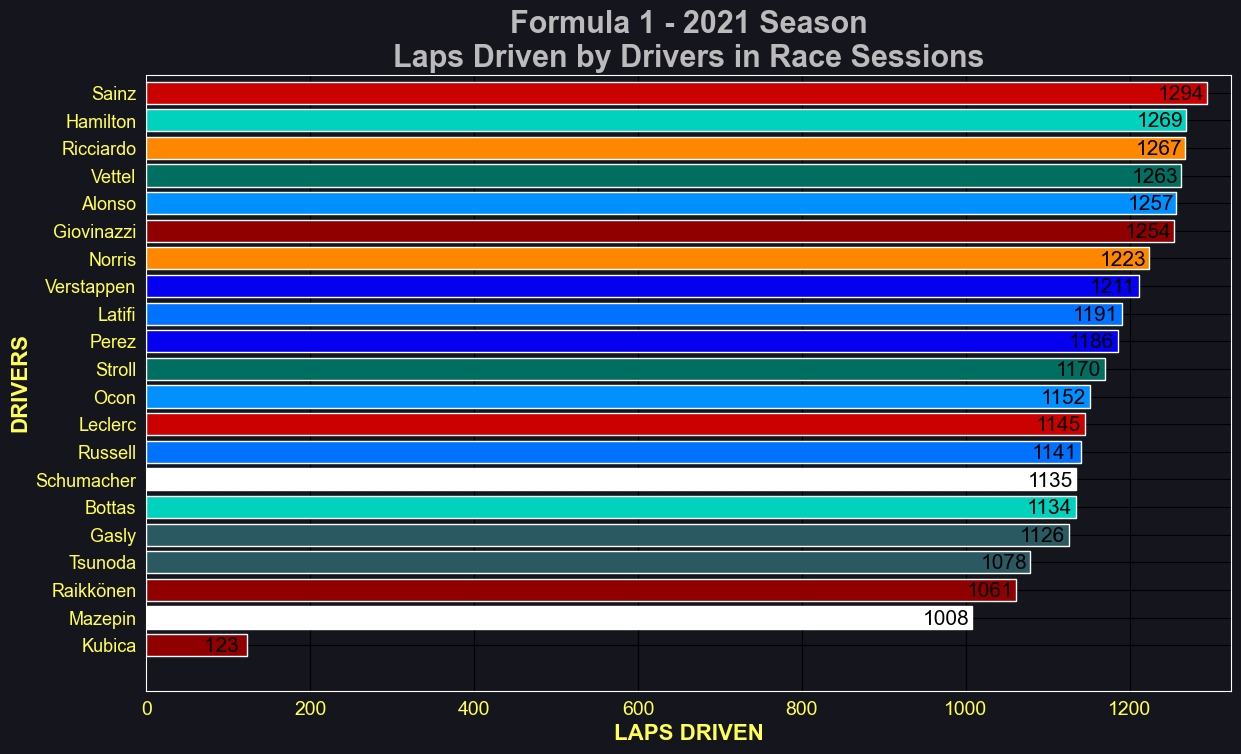

In [114]:
driversLaps = raceResults.groupby('Driver')['Laps'].sum().sort_values(ascending=False)
c = assign_color('drivers', driversLaps.index)
plt.figure(figsize=(14,8))
plt.axis([0, max(driversLaps.values)+30, 21.65, -0.65])
plt.barh([driver.split()[1] for driver in driversLaps.index], driversLaps.values, color=c)
plt.title("Formula 1 - 2021 Season\nLaps Driven by Drivers in Race Sessions", fontsize=22, fontweight='bold', color='#bbbbbb')
for i in range(len(driversLaps)):
    plt.text(driversLaps.values[i]-60, i+0.25, "{:4}".format(driversLaps.values[i]), fontsize=15, color='k')
plt.xlabel('LAPS DRIVEN', fontsize=16, color='#ffff55', fontweight='bold')
plt.xticks(fontsize=14, color='#ffff55')
plt.ylabel('DRIVERS', fontsize=16, color='#ffff55', fontweight='bold')
plt.yticks(fontsize=13, color='#ffff55')
plt.show()

# Conclusion